### Customer Value Prediction & Segmentation

## LIBRARIES


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Categorical Encoding
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder , OneHotEncoder , TargetEncoder
import category_encoders as ce

import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor


from xgboost import XGBRegressor


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.metrics import classification_report, confusion_matrix


from sklearn.cluster import KMeans

from sklearn.model_selection import KFold, cross_val_score, train_test_split
import xgboost as xgb


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Concatenate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


In [2]:
import warnings

warnings.filterwarnings('ignore')

## READING DATA 

In [4]:
df = pd.read_excel(r"D:\Fares Material\ML-DL\Route Course\Route Final project\online+retail\Online Retail.xlsx" )

# DATA PREPROCESSING

## Exploring & Cleaning 

In [5]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [6]:
df.duplicated().sum()


np.int64(5268)

In [7]:
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
## Removing Nulls 
data= df.dropna()
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
##                      Remove Cancelled orders                         ##
data = data[(data['Quantity'] > 0) & (~data['InvoiceNo'].astype(str).str.startswith('C'))]
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

##              Calculating Total spending for The customers            ## 
data['Total'] = data['Quantity'] * data['UnitPrice']
data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   Total        397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


## RFM FEATURES 

In [13]:
##                                  Calculating The RFM Features                ## 

data_rfm = data.groupby('CustomerID').InvoiceDate.max().reset_index()
data_rfm.columns = ['CustomerID','MaxPurchaseDate']
data_rfm.head(3) # Get the max purchase date of each customer


,CustomerID,MaxPurchaseDate
0,12346.0,2011-01-18 10:01:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00


In [14]:
##               Recency calculation                ##

recent_date = data_rfm['MaxPurchaseDate'].max()
data_rfm['Recency'] = data_rfm['MaxPurchaseDate'].apply(lambda x: (recent_date - x).days)
data_rfm.head()

,CustomerID,MaxPurchaseDate,Recency
0,12346.0,2011-01-18 10:01:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309


In [15]:
##               Frequency of ordering            ##
freq_df = data.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()
freq_df.columns = ["CustomerID", "Frequency"]
##               Merge to RFM DataFrame           ##
data_rfm = data_rfm.merge(freq_df, on="CustomerID", how="left")
data_rfm.head()

,CustomerID,MaxPurchaseDate,Recency,Frequency
0,12346.0,2011-01-18 10:01:00,325,1
1,12347.0,2011-12-07 15:52:00,1,7
2,12348.0,2011-09-25 13:13:00,74,4
3,12349.0,2011-11-21 09:51:00,18,1
4,12350.0,2011-02-02 16:01:00,309,1


In [16]:
##              Monetary                        ##


df['Total'] = df['Quantity'] * df['UnitPrice']

monetary_df = df.groupby('CustomerID')['Total'].sum().reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']

data_rfm = data_rfm.merge(monetary_df, on="CustomerID", how="left")

data_rfm.head()



,CustomerID,MaxPurchaseDate,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:01:00,325,1,0.00
1,12347.0,2011-12-07 15:52:00,1,7,4310.00
2,12348.0,2011-09-25 13:13:00,74,4,1797.24
3,12349.0,2011-11-21 09:51:00,18,1,1757.55
4,12350.0,2011-02-02 16:01:00,309,1,334.40


In [17]:
data_rfm.head()

,CustomerID,MaxPurchaseDate,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:01:00,325,1,0.00
1,12347.0,2011-12-07 15:52:00,1,7,4310.00
2,12348.0,2011-09-25 13:13:00,74,4,1797.24
3,12349.0,2011-11-21 09:51:00,18,1,1757.55
4,12350.0,2011-02-02 16:01:00,309,1,334.40


## Handling & Encoding 

In [18]:
##              Convert Months to Seasons               ## 
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"
##              Convert Seasons to Numbers              ##
season_mapping = {
    "Winter": 0,
    "Spring": 1,
    "Summer": 2,
    "Fall":   3
}

##              Convert Date to numbers                 ##
data["Hour"] = data["InvoiceDate"].dt.hour
data["DayOfWeek"] = data["InvoiceDate"].dt.dayofweek
data["Month"] = data["InvoiceDate"].dt.month


data["Season"] = data["Month"].apply(get_season)
data["Season"] = data["Season"].map(season_mapping)

data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Hour,DayOfWeek,Month,Season
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,8,2,12,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,2,12,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,8,2,12,0


In [19]:
data = data.merge(data_rfm, on='CustomerID', how='left')

## As Target is unit price * quantity so i dropped one of them so that model doesnt overfit 
data.drop(columns="UnitPrice",inplace=True)

##                                Train/val/test split by CustomerID                    ##
## Train test split was done early as target encoder was used (Prevent Data leakage)
customers = data['CustomerID'].unique()
## 60 % Train , 20 % Validation , 20 % Testing 
train_cust, test_cust = train_test_split(customers, test_size=0.2, random_state=42)
train_cust, val_cust = train_test_split(train_cust, test_size=0.25, random_state=42)

#building the actual data splits based on customer assignment
train_df = data[data['CustomerID'].isin(train_cust)].copy()  # all data for customers in train_cust
val_df   = data[data['CustomerID'].isin(val_cust)].copy()    # all data for customers in val_cust
test_df  = data[data['CustomerID'].isin(test_cust)].copy()   # all data for customers in test_cust


##                               Encode categorical variables                           ##

desc_encoder = ce.TargetEncoder(smoothing=0.3)
train_df['Description'] = desc_encoder.fit_transform(train_df['Description'], train_df['Total'])
val_df['Description'] = desc_encoder.transform(val_df['Description'])
test_df['Description'] = desc_encoder.transform(test_df['Description'])

country_encoder = ce.OrdinalEncoder()
train_df['Country'] = country_encoder.fit_transform(train_df['Country'])
val_df['Country'] = country_encoder.transform(val_df['Country'])
test_df['Country'] = country_encoder.transform(test_df['Country'])

In [20]:

numerical_features = ['Quantity', 'Hour', 'DayOfWeek', 'Month', 'Season',
                      'Recency', 'Frequency', 'Monetary']
categorical_features = ['Description', 'Country']

features = categorical_features + numerical_features
target = 'Total'
## Removing Outliers in the data 
upper = train_df[numerical_features].quantile(0.66)
train_filtered = train_df[(train_df[numerical_features] <= upper).all(axis=1)].copy()

X_train = train_filtered[features]
y_train = train_filtered[target]

X_val = val_df[features].copy()
y_val = val_df[target].copy()

X_test = test_df[features].copy()
y_test = test_df[target].copy()

scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_val[numerical_features] = scaler.transform(X_val[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])



# Supervised Learning 

In [21]:
# Linear Regression Model 
lr = LinearRegression()
lr.fit(X_train, y_train)

# Validation
y_val_pred = lr.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

print("Linear Regression Results:")

print("Validation MAE:", val_mae)
print("Validation RMSE:", val_rmse)
print("Validation R2:", val_r2)

# Test
y_test_pred = lr.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)



Linear Regression Results:
Validation MAE: 15.665692838283997
Validation RMSE: 243.5444121317603
Validation R2: 0.8456608051187426
Test MAE: 13.411124240690272
Test RMSE: 112.06363033249352
Test R2: 0.8345898261374718


XGBoost Performance :
Validation MAE: 0.0
Validation RMSE: 0.0
Validation R2: 1.0
Test MAE: 0.0
Test RMSE: 0.0
Test R2: 1.0


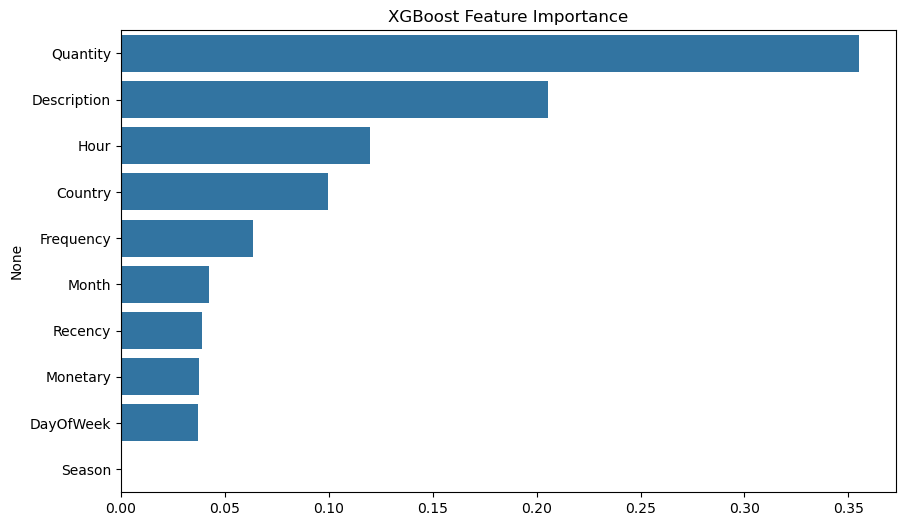

In [22]:
# XGBoost 
#Best Hyperparameters: {'subsample': 0.7, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 1.0}

xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.7,
    colsample_bytree=1,
    tree_method='gpu_hist',
    predictor='gpu_predictor',
    random_state=42,
    reg_lambda=1.5,
    reg_alpha=0,
    gamma=1
)

# Train
xgb_model.fit(X_train, y_train)
y_val  = xgb_model.predict(X_val)
y_test= xgb_model.predict(X_test)

print ("XGBoost Performance :")

# Validation
y_val_pred = xgb_model.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

print("Validation MAE:", val_mae)
print("Validation RMSE:", val_rmse)
print("Validation R2:", val_r2)

# Test
y_test_pred = xgb_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)
# Feature importance for XGBoost
importances_xgb = pd.Series(xgb_model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances_xgb.values, y=importances_xgb.index)
plt.title("XGBoost Feature Importance")
plt.show()

Random Forest Performance:
Validation MAE: 1.8274239454824037
Validation RMSE: 3.3868093392682725
Validation R2: 0.8073166190499899
Test MAE: 1.7601782293577657
Test RMSE: 3.4438039932561546
Test R2: 0.8024433108877703


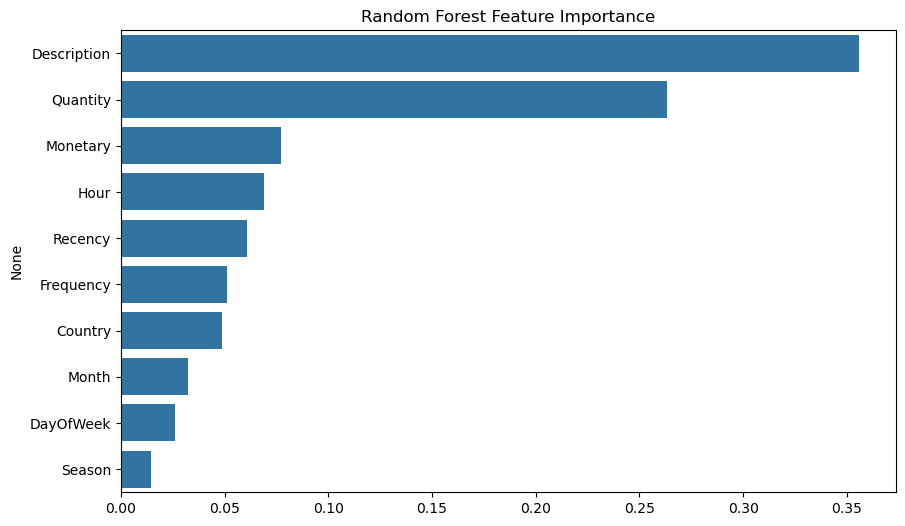

In [23]:
#  Random Forest Regressor

#Best Random Forest Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}
rf = RandomForestRegressor(n_estimators=200, random_state=42,min_samples_split= 2, min_samples_leaf = 4, max_features = 'sqrt', max_depth =20)
rf.fit(X_train, y_train)

y_val_pred_rf = rf.predict(X_val)
y_test_pred_rf = rf.predict(X_test)

print("Random Forest Performance:")
print("Validation MAE:", mean_absolute_error(y_val, y_val_pred_rf))
print("Validation RMSE:", np.sqrt(mean_squared_error(y_val, y_val_pred_rf)))
print("Validation R2:", r2_score(y_val, y_val_pred_rf))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred_rf))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_rf)))
print("Test R2:", r2_score(y_test, y_test_pred_rf))
importances_rf = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances_rf.values, y=importances_rf.index)
plt.title("Random Forest Feature Importance")
plt.show()

# Unsupervised Learning 

In [24]:
def remove_outliers_iqr_and_negatives(df, columns):

    df_clean = df.copy()
    
    # Filter out negative/zero Monetary values
    df_clean = df_clean[df_clean['Monetary'] > 0]
    # Filter out 0 Recency 
    df_clean = df_clean[df_clean['Recency'] > 0] 
    

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Apply filter
        mask = (df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)
        
        
        df_clean = df_clean[mask]
    
    return df_clean

# Apply to your data
features = ['Recency', 'Frequency', 'Monetary']
data_rfm_clean = remove_outliers_iqr_and_negatives(data_rfm, features)

data_rfm_clean.shape


(3559, 5)

In [25]:

rfm_data = data_rfm_clean[features].copy()
rfm_log = np.log(rfm_data)

# B. Scaling (Standardization)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=features, index=rfm_data.index)

#  Clustering (KMeans & GMM) ---
# A. KMeans Clustering (k=5)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(rfm_scaled)

# Gaussian Mixture Models (Probabilistic)
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(rfm_scaled)
gmm_labels = gmm.predict(rfm_scaled)

# Assign labels back to the dataframe
data_rfm_clean['Cluster_KMeans'] = kmeans_labels
data_rfm_clean['Cluster_GMM'] = gmm_labels

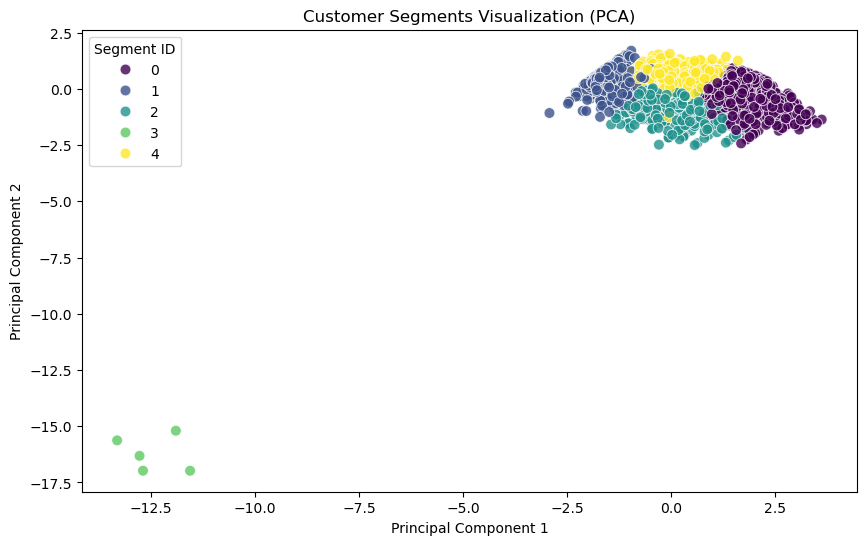

In [26]:
# Dimensionality Reduction & Visualization (PCA)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(rfm_scaled)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=60, alpha=0.8)
plt.title('Customer Segments Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Segment ID')
plt.show()


In [27]:
# Calculate average Recency, Frequency, and Monetary for each cluster
cluster_summary = data_rfm_clean.groupby('Cluster_KMeans')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()
cluster_summary['Count'] = data_rfm_clean.groupby('Cluster_KMeans')['CustomerID'].count().values

# Recency is inverted (Lower Recency = Better Rank)
def get_rank(row):
    r_score = row['Recency_Rank']
    f_score = row['Frequency_Rank']
    m_score = row['Monetary_Rank']

    if m_score >= 4 and f_score >= 4 and r_score >= 4:
        return "First Class"
    elif m_score >= 4 and r_score >= 3:
        return "Second Class"
    elif r_score >= 4 and f_score <= 3:
        return "Third Class"
    elif r_score <= 2 and f_score >= 4:
        return "Fourth Score"  
    elif r_score <= 2 and m_score <= 2:
        return "Fifth class"
    elif f_score >= 3:
        return "Sixth class"
    else:
        return "Ignore"


In [28]:
cluster_summary['Recency_Rank'] = cluster_summary['Recency'].rank(ascending=False) 
cluster_summary['Frequency_Rank'] = cluster_summary['Frequency'].rank(ascending=True)
cluster_summary['Monetary_Rank'] = cluster_summary['Monetary'].rank(ascending=True)
# Apply Naming
cluster_summary['Rank'] = cluster_summary.apply(get_rank, axis=1)

# Show results
print("\n--- Ranks ---")
cols = ['Cluster_KMeans', 'Rank', 'Count', 'Recency', 'Frequency', 'Monetary']
print(cluster_summary[cols].sort_values('Monetary', ascending=False).to_string(index=False))


# --- Country and Product Analysis ---
# Merge data
df_segmented = df.merge(data_rfm_clean[['CustomerID', 'Cluster_KMeans']], on='CustomerID', how='inner')

# Top Country
print("\n--- Top Country ---")
country_counts = df_segmented.groupby(['Cluster_KMeans', 'Country']).size().reset_index(name='Count')
top_countries = country_counts.sort_values('Count', ascending=False).groupby('Cluster_KMeans').head(1)
print(top_countries)

# Top Product
print("\n--- Top Product ---")
prod_counts = df_segmented.groupby(['Cluster_KMeans', 'Description']).size().reset_index(name='Count')
top_products = prod_counts.sort_values('Count', ascending=False).groupby('Cluster_KMeans').head(1)
print(top_products)


--- Ranks ---
 Cluster_KMeans         Rank  Count    Recency  Frequency     Monetary
              0  First Class    823  18.560146   5.388821 1.490163e+03
              4 Fourth Score   1032 113.972868   2.934109 8.781520e+02
              2  Third Class    635  20.943307   1.513386 4.348185e+02
              1  Fifth class   1064 175.743421   1.031955 3.398523e+02
              3       Ignore      5  73.600000   1.000000 1.527667e-14

--- Top Country ---
    Cluster_KMeans         Country  Count
16               0  United Kingdom  90788
85               4  United Kingdom  55441
60               2  United Kingdom  21074
44               1  United Kingdom  19616
62               3             USA    224

--- Top Product ---
       Cluster_KMeans                         Description  Count
3233                0  WHITE HANGING HEART T-LIGHT HOLDER    532
12274               4  WHITE HANGING HEART T-LIGHT HOLDER    400
5424                1            REGENCY CAKESTAND 3 TIER    124
8225 

Calculating Silhouette Scores...
For k = 2, the Silhouette Score is: 0.4092
For k = 3, the Silhouette Score is: 0.4163
For k = 4, the Silhouette Score is: 0.3484
For k = 5, the Silhouette Score is: 0.3604
For k = 6, the Silhouette Score is: 0.3470
For k = 7, the Silhouette Score is: 0.3616
For k = 8, the Silhouette Score is: 0.3596
For k = 9, the Silhouette Score is: 0.3575
For k = 10, the Silhouette Score is: 0.3413


Best k value: 3
Best Silhouette Score: 0.4163


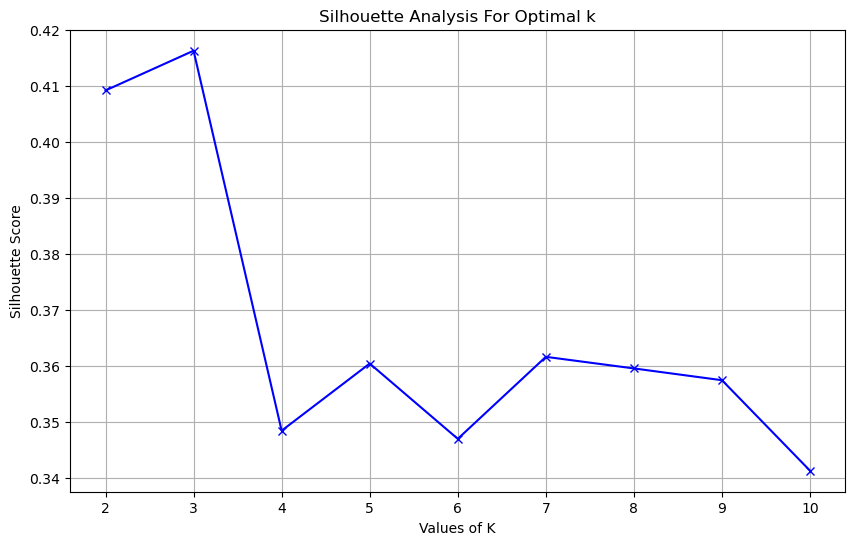

In [29]:
##                              Use silhouette scores to optimize number of clusters                    ## 
range_n_clusters = range(2, 11)
silhouette_avg = []
best_k = 0
best_score = -1

print("Calculating Silhouette Scores...")

for k in range_n_clusters:

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(rfm_scaled) 
    
    score = silhouette_score(rfm_scaled, cluster_labels)
    silhouette_avg.append(score)
    
    print(f"For k = {k}, the Silhouette Score is: {score:.4f}")
    
    #  the best score
    if score > best_score:
        best_score = score
        best_k = k

print(f"\n")
print(f"Best k value: {best_k}")
print(f"Best Silhouette Score: {best_score:.4f}")



plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.grid(True)
plt.show()

# Deep learning 

In [30]:

#add cluster feature
def add_cluster_feature(df, rfm_df):

    # Merge using Cluster_KMeans
    df_temp = df.merge(rfm_df[['CustomerID', 'Cluster_KMeans']], on='CustomerID', how='left')
    
    # Fill NaN with -1 (for customers who might be in the splits but filtered out of RFM analysis)
    df_temp['Cluster_KMeans'] = df_temp['Cluster_KMeans'].fillna(-1)
    
    return df_temp['Cluster_KMeans'].values.reshape(-1, 1)



X_train shape: (14291, 10)
train_clusters shape: (14291, 1)
Deep Learning Input Shape: (14291, 11)

--- Training Autoencoder ---
Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 57.5451 - val_loss: 1289.4758
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.5475 - val_loss: 1432.3286
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1630 - val_loss: 1376.5968
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8847 - val_loss: 1356.5443
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6916 - val_loss: 1145.0613
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5872 - val_loss: 1011.4070
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4817 - val_loss: 989.6966
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4029 - val_loss: 1049.1010
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3380 - val_loss: 1080.4286
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2627 - val_loss: 1124.4255


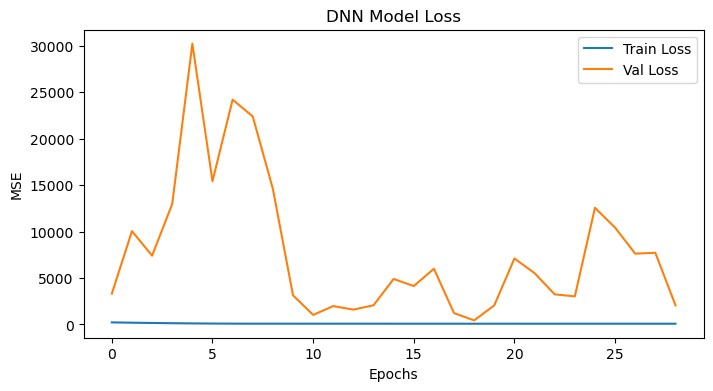

In [31]:
train_clusters = add_cluster_feature(train_filtered, data_rfm_clean)
val_clusters = add_cluster_feature(val_df, data_rfm_clean)
test_clusters = add_cluster_feature(test_df, data_rfm_clean)

# Verify shapes before stacking
print(f"X_train shape: {X_train.values.shape}")
print(f"train_clusters shape: {train_clusters.shape}")

# Combine Original Features + Cluster Feature
X_train_dl = np.hstack((X_train.values, train_clusters))
X_val_dl = np.hstack((X_val.values, val_clusters))
X_test_dl = np.hstack((X_test.values, test_clusters))

print(f"Deep Learning Input Shape: {X_train_dl.shape}")

# --- 5.2 Autoencoder for Unsupervised Feature Learning ---
input_dim = X_train_dl.shape[1]
encoding_dim = 8

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
bottleneck = Dense(encoding_dim, activation='relu', name='bottleneck')(encoded)

# Decoder
decoded = Dense(16, activation='relu')(bottleneck)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(input_layer, decoded)
encoder_model = Model(input_layer, bottleneck)

autoencoder.compile(optimizer='adam', loss='mse')

print("\n--- Training Autoencoder ---")
autoencoder.fit(X_train_dl, X_train_dl,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_val_dl, X_val_dl),
                verbose=1)

# Extract Latent Features
X_train_latent = encoder_model.predict(X_train_dl)
X_val_latent = encoder_model.predict(X_val_dl)
X_test_latent = encoder_model.predict(X_test_dl)

# Combine for DNN
X_train_final = np.hstack((X_train_dl, X_train_latent))
X_val_final = np.hstack((X_val_dl, X_val_latent))
X_test_final = np.hstack((X_test_dl, X_test_latent))

# --- 5.3 DNN Regressor (Specific Architecture) ---
# Architecture: 128 -> 64 -> 32 -> 16
model = Sequential()

# Hidden Layer 1
model.add(Dense(128, input_dim=X_train_final.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Hidden Layer 2
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Hidden Layer 3
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Hidden Layer 4
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(1, activation='linear'))

# Compilation
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training
print("\n--- Training DNN Regressor ---")
history = model.fit(X_train_final, y_train,
                    validation_data=(X_val_final, y_val),
                    epochs=50,
                    batch_size=128,
                    callbacks=[early_stop],
                    verbose=1)

# --- 5.4 Evaluation ---
y_pred_dnn = model.predict(X_test_final).flatten()

print("\n--- Deep Learning Results ---")
print("DNN MAE:", mean_absolute_error(y_test, y_pred_dnn))
print("DNN RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dnn)))
print("DNN R2:", r2_score(y_test, y_pred_dnn))

# Plot Loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('DNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()